In [ ]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

In [2]:
!wget 'https://archive.org/download/ages-and-heights/AgesAndHeights.pkl'

--2022-10-07 19:35:52--  https://archive.org/download/ages-and-heights/AgesAndHeights.pkl
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia601802.us.archive.org/31/items/ages-and-heights/AgesAndHeights.pkl [following]
--2022-10-07 19:35:53--  https://ia601802.us.archive.org/31/items/ages-and-heights/AgesAndHeights.pkl
Resolving ia601802.us.archive.org (ia601802.us.archive.org)... 207.241.227.72
Connecting to ia601802.us.archive.org (ia601802.us.archive.org)|207.241.227.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2406 (2.3K) [application/octet-stream]
Saving to: ‘AgesAndHeights.pkl’

AgesAndHeights.pkl  100%[===================>]   2.35K  --.-KB/s    in 0s      

2022-10-07 19:35:56 (58.1 MB/s) - ‘AgesAndHeights.pkl’ saved [2406/2406]



In [3]:
!ls

AgesAndHeights.pkl  app.py  model.ipynb


In [4]:
data = pd.read_pickle('AgesAndHeights.pkl')
data

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


In [5]:
ages = data['Age']
heights = data['Height']
ages

0     14.767874
1      3.107671
2      7.266917
3      1.815180
4     16.753758
        ...    
95     7.323712
96     5.591509
97     2.625606
98     5.519293
99    13.117413
Name: Age, Length: 100, dtype: float64

<AxesSubplot: >

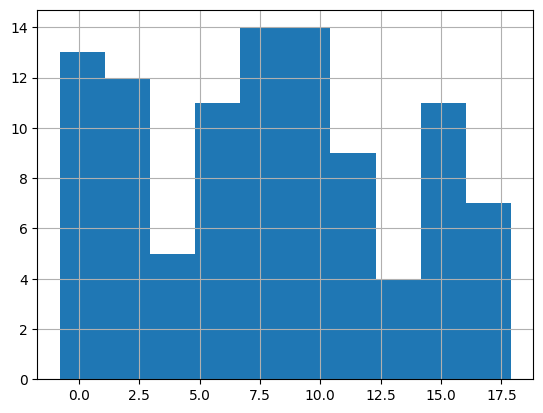

In [7]:
ages.hist()

<AxesSubplot: >

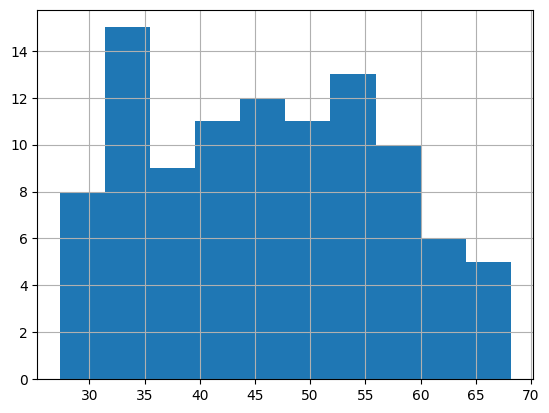

In [8]:
heights.hist()

<AxesSubplot: >

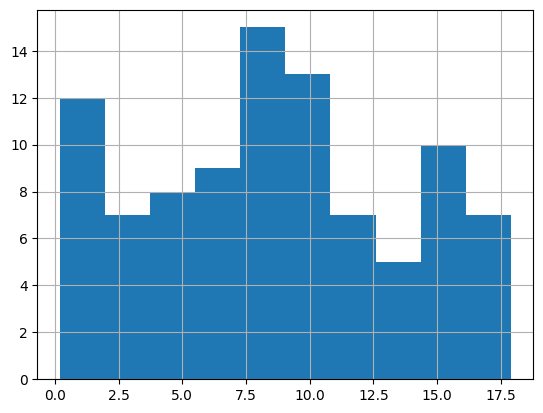

In [9]:
data = data[ages > 0]
data['Age'].hist()

In [10]:
ages = data['Age']
heights = data['Height']

In [11]:
import plotly.express as px
import plotly.graph_objects as go

In [55]:
fig = px.scatter(x=ages, y=heights, title='Heights vs Age of people', labels={'x':'Age (years)', 'y':'Height (inches)'})
fig.show()

In [13]:
ages_np = ages.to_numpy()
heights_np = heights.to_numpy()

ages_np.shape, heights_np.shape

((93,), (93,))

In [15]:
ages_np = ages_np.reshape(ages_np.shape[0], 1)
ages_np.shape

(93, 1)

In [16]:
model = LinearRegression().fit(ages_np, heights_np)
model.coef_

array([2.0014169])

In [17]:
x_new = np.array([range(19)]).reshape(19, 1)
preds = model.predict(x_new)

In [56]:
fig.add_trace(go.Scatter(x=x_new.reshape(x_new.shape[0]), y=preds, mode='lines', name='Model'))
fig.write_image('base.svg', width=800)
fig.show()

In [45]:
from joblib import dump, load
import requests

In [20]:
dump(model, 'model.joblib')
!ls

AgesAndHeights.pkl  app.py  model.ipynb  model.joblib


In [22]:
model_test = load('model.joblib')
model_test.predict(np.array([[1], [2], [3]]))

array([31.96327451, 33.96469141, 35.96610831])

In [41]:
def make_picture(training_data_filename, model, new_input_arr, output_file):
    # assert training_data_filename[-1:-5] == '.pkl'
    data = pd.read_pickle(training_data_filename)
    ages = data['Age']
    data = data[ages > 0]
    ages = data['Age']
    heights = data['Height']

    x_new = np.array([range(19)]).reshape(19, 1)
    preds = model.predict(x_new)

    fig = px.scatter(x=ages, y=heights, title='Heights vs Age of people', labels={'x':'Age (years)', 'y':'Height (inches)'})
    fig.add_trace(go.Scatter(x=x_new.reshape(x_new.shape[0]), y=preds, mode='lines', name='Model'))

    new_preds = model.predict(new_input_arr)
    fig.add_trace(go.Scatter(x=new_input_arr.reshape(len(new_input_arr)), y=new_preds, mode='markers', name='New Outputs', marker=dict(color='purple', size=20, line=dict(color='purple', width=2))))
    fig.write_image(output_file, width=800)
    fig.show()

In [53]:
make_picture('AgesAndHeights.pkl', model_test, floats_string_to_np_arr('1,  3, 3.2  '), 'output.svg')

In [47]:
!ls

AgesAndHeights.pkl  app.py  model.ipynb  model.joblib  output.svg


In [51]:
def floats_string_to_np_arr(floats_str):
    def is_float(s):
        try:
            float(s)
            return True
        except:
            return False
    floats = [float(x) for x in floats_str.split(',') if is_float(x)]
    return np.array(floats).reshape(len(floats), 1)

In [52]:
floats_string_to_np_arr('1,  3, 3.2  ')

array([[1. ],
       [3. ],
       [3.2]])